# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import keras

In [2]:
dataset= pd.read_csv("DNN-EdgeIIoT-dataset.csv",low_memory=False)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [6]:
dataset.shape

(2219201, 63)

# Data Preprocessing

In [7]:
dataset= dataset.drop(columns=['Attack_type'])

In [8]:
dataset.isna().sum()

frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mqtt.ver              0
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Length: 62, dtype: int64

In [9]:
dataset.drop_duplicates(subset=None, keep="first", inplace=True)
dataset.duplicated().sum()


0

In [10]:
dataset['Attack_label'].value_counts()

Attack_label
0    1615643
1     602743
Name: count, dtype: int64

In [11]:
def encod(data):
  n=data.shape[1]
  from sklearn import preprocessing
  label_encoder = preprocessing.LabelEncoder()
  for i in range(n):
      if data.iloc[:,i].dtype == 'object':
        data.iloc[:,i]= label_encoder.fit_transform(data.iloc[:,i])
  return data

In [12]:
# Label encoding
dataset=encod(dataset)


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
0,57650,58101,22987,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
1,57651,58100,22988,0,0.0,0.0,0,0.0,0.0,0.0,...,1.0,4.0,2,0,0.0,4.0,0.0,0.0,0.0,0
2,57652,58101,22987,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
3,57653,58101,22987,0,0.0,0.0,0,0.0,0.0,0.0,...,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,57654,58100,22988,0,0.0,0.0,0,0.0,0.0,0.0,...,3.0,0.0,0,2,24.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2093397,43780,22988,0,0.0,0.0,0,31814.0,45620.0,0.0,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1
2219197,2093398,121518,22988,0,0.0,0.0,0,27718.0,45636.0,0.0,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1
2219198,2093399,104154,22988,0,0.0,0.0,0,18502.0,45672.0,0.0,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1
2219199,2093400,50370,22988,0,0.0,0.0,0,1862.0,45737.0,0.0,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1


In [13]:
dataset.Attack_label.unique()

array([0, 1], dtype=int64)

In [14]:
X=dataset.drop(['Attack_label'],axis=1)
y=dataset['Attack_label']
dataset=0

In [15]:
np.unique(y)
y= y.astype('int')

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm = pd.Series(y_sm)

In [17]:
X=0
y=0

In [18]:
pd.Series(y_sm).value_counts()

Attack_label
0    1615643
1    1615643
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [20]:
X_sm=0
y_sm=0

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
X_train.shape

(2585028, 61)

# Vanilla Autoencoder Model

In [23]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation

In [24]:
input_dim = X_train.shape[1]

In [25]:
input_vanilla = tf.keras.Input(shape=(input_dim,), name='input_vanilla')
encoded_vanilla = Dense(128, activation='relu', name='encode1_vanilla')(input_vanilla)
encoded_vanilla = Dense(64, activation='relu', name='encode2_vanilla')(encoded_vanilla)
encoded_vanilla = Dense(32, activation='relu', name='latent_vanilla')(encoded_vanilla)

decoded_vanilla = Dense(64, activation='relu', name='decode1_vanilla')(encoded_vanilla)
decoded_vanilla = Dense(128, activation='relu', name='decode2_vanilla')(decoded_vanilla)
output_vanilla = Dense(input_dim, activation='sigmoid', name='output_vanilla')(decoded_vanilla)



In [26]:
vanilla = tf.keras.Model(input_vanilla, output_vanilla)

vanilla.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_vanilla (InputLayer)           │ (None, 61)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode1_vanilla (Dense)              │ (None, 128)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode2_vanilla (Dense)              │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_vanilla (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode1_vanilla (Dense)              │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode2_vanilla (Dense)              │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_vanilla (Dense)               │ (None, 61)                  │           7,869 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,573 (142.86 KB)

 Trainable params: 36,573 (142.86 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
vanilla.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'vanillamodel_Edge_IIoT_smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)

callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=vanilla.fit(X_train, X_train,epochs=100,batch_size=32, callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))



Epoch 1/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 73s 864us/step - loss: 0.0019
Epoch 2/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 71s 873us/step - loss: 7.2805e-05
Epoch 3/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 69s 846us/step - loss: 5.5960e-05
Epoch 4/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 69s 855us/step - loss: 1.5982e-05
Epoch 5/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 70s 861us/step - loss: 1.4360e-05
Epoch 6/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 72s 894us/step - loss: 1.3886e-05
Epoch 7/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 69s 857us/step - loss: 1.1887e-05
Epoch 8/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 70s 862us/step - loss: 1.1142e-05
Epoch 9/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 165s 2ms/step - loss: 1.0943e-05
Epoch 10/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 214s 3ms/step - loss: 1.0910e-05
Epoch 11/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 251s 3ms/step - loss: 9.1731e-06
Epoch 12/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 221s 3ms/step - loss: 9.4628e-06
Epoch 13/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/st

In [30]:
vanilla.evaluate(X_test,X_test)

20196/20196 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 4.9856e-06


5.288200554787181e-06

In [32]:
for layer in vanilla.layers:
    layer.trainable =False

vanilla.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_vanilla (InputLayer)           │ (None, 61)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode1_vanilla (Dense)              │ (None, 128)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode2_vanilla (Dense)              │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_vanilla (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode1_vanilla (Dense)              │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode2_vanilla (Dense)              │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_vanilla (Dense)               │ (None, 61)                  │           7,869 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,721 (428.60 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 36,573 (142.86 KB)

 Optimizer params: 73,148 (285.74 KB)

# Variational Autoencoder Model

In [33]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Concatenate
from tensorflow.keras.losses import mse
from keras import layers

In [34]:
class Sampling(layers.Layer):
	"""Uses (mean, log_var) to sample z, the vector encoding a digit."""

	def call(self, inputs):
		mean, log_var = inputs
		batch = tf.shape(mean)[0]
		dim = tf.shape(mean)[1]
		epsilon = tf.random.normal(shape=(batch, dim))
		return mean + tf.exp(0.5 * log_var) * epsilon


In [35]:
latent_dim = 16
#encoder
encoder_inputs = keras.Input(shape=(input_dim,),name='encoder_input')
x = layers.Dense(128, activation="relu",name="encoder1")(encoder_inputs)
x = layers.Dense(64, activation="relu",name="enocder2")(x)
x = layers.Dense(32, activation="relu",name="encoder_latent_vae")(x)
mean = layers.Dense(latent_dim, name="mean")(x)
log_var = layers.Dense(latent_dim, name="log_var")(x)
z = Sampling()([mean, log_var])

encoder = keras.Model(encoder_inputs, [mean, log_var, z], name="encoder")
encoder.summary()



Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 61)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           7,936 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 19,328 (75.50 KB)

 Trainable params: 19,328 (75.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#decoder

latent_inputs = keras.Input(shape=(latent_dim,),name='decoder_input')
x = layers.Dense(32, activation="relu",name="decoder1_vae")(latent_inputs)
x = layers.Dense(64, activation="relu", name="decoder2_vae")(x)
x = layers.Dense(128, activation="relu", name="decoder3_vae")(x)
decoder_outputs = layers.Dense(input_dim, activation="sigmoid", name='decoder_output')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1_vae (Dense)                 │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2_vae (Dense)                 │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder3_vae (Dense)                 │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Dense)               │ (None, 61)                  │           7,869 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,845 (73.61 KB)

 Trainable params: 18,845 (73.61 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
# for training a defining and training a VAE model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
        self.optimizer = tf.keras.optimizers.Adam()

    def train_step(self, data):
        data = tf.convert_to_tensor(data)
        with tf.GradientTape() as tape:
            mean, log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(MeanSquaredError()(data, reconstruction)) * data.shape[1]
            
            kl_loss = -0.5 * tf.reduce_sum(1 + log_var - tf.square(mean) - tf.exp(log_var), axis=-1)
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]



In [38]:
#instance of the VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer=vae.optimizer)
vae.summary()

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder (Functional)                 │ ?                           │          19,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ ?                           │          18,845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,173 (149.11 KB)

 Trainable params: 38,173 (149.11 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'variaAEmodel_Edge_IIoT_smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)


callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=vae.fit(X_train,epochs=100,batch_size=32,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))
print("Available keys in history:", history.history.keys())


Epoch 1/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 351s 4ms/step - kl_loss: 5.8512e-04 - loss: 1.9519 - reconstruction_loss: 1.9514
Epoch 2/100


C:\Users\yvash\anaconda3\Lib\site-packages\keras\src\saving\saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


80783/80783 ━━━━━━━━━━━━━━━━━━━━ 308s 4ms/step - kl_loss: 8.4985e-08 - loss: 1.9259 - reconstruction_loss: 1.9259
Epoch 3/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 293s 4ms/step - kl_loss: 1.0778e-08 - loss: 1.9262 - reconstruction_loss: 1.9262
Epoch 4/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 399s 5ms/step - kl_loss: 7.5009e-08 - loss: 1.9265 - reconstruction_loss: 1.9265
Epoch 5/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 271s 3ms/step - kl_loss: 1.7744e-09 - loss: 1.9269 - reconstruction_loss: 1.9269
Epoch 6/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 273s 3ms/step - kl_loss: 1.5630e-09 - loss: 1.9272 - reconstruction_loss: 1.9272
Epoch 7/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 250s 3ms/step - kl_loss: 1.5620e-09 - loss: 1.9260 - reconstruction_loss: 1.9260
Epoch 8/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 273s 3ms/step - kl_loss: 1.5473e-09 - loss: 1.9253 - reconstruction_loss: 1.9253
Epoch 9/100
80783/80783 ━━━━━━━━━━━━━━━━━━━━ 262s 3ms/step - kl_loss: 2.2923e-09 - loss: 1.9276 - reconstruction_loss: 1.9276
Epoc

In [41]:
vae.encoder.save('encoder_Edge_IIoT_smote.keras')

In [42]:
vae.decoder.save('decoder_Edge_IIoT_smote.keras')

In [43]:
vae.encoder.get_layer('sampling').output

<KerasTensor shape=(None, 16), dtype=float32, sparse=False, name=keras_tensor_11>

In [44]:
a,b,encoded=vae.encoder.predict(X_test)

20196/20196 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step


In [45]:
decoded=vae.decoder.predict(encoded)

20196/20196 ━━━━━━━━━━━━━━━━━━━━ 13s 629us/step


In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, decoded)

0.03158609327326078

In [49]:
for layer in vae.encoder.layers:
    layer.trainable = False
vae.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 61)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           7,936 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 19,328 (75.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19,328 (75.50 KB)

In [50]:
vae.encoder.get_layer('sampling').output

<KerasTensor shape=(None, 16), dtype=float32, sparse=False, name=keras_tensor_11>

# Combined latent_space and creating a decoder

In [51]:

VAE_input = vae.encoder.input
VAE_output = vae.encoder.get_layer('sampling').output

VaAE_input = vanilla.input
VaAE_output = vanilla.get_layer('latent_vanilla').output

combined = Concatenate(name='combined')([VAE_output, VaAE_output])

l = Dense(128, activation='relu', name='combined1')(combined)
l = Dense(64, activation='relu', name='combined2')(l)
l = Dense(32, activation='relu', name='combined3')(l)
output_combined= Dense(1, activation='sigmoid', name='combined_output')(l)


combined_model = tf.keras.Model([VAE_input, VaAE_input], output_combined)


In [52]:
combined_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 61)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           7,936 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_vanilla (InputLayer)    │ (None, 61)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encode1_vanilla (Dense)       │ (None, 128)               │           7,936 │ input_vanilla[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encode2_vanilla (Dense)       │ (None, 64)                │           8,256 │ encode1_vanilla[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ latent_vanilla (Dense)        │ (None, 32)                │           2,080 │ encode2_vanilla[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined (Concatenate)        │ (None, 48)                │               0 │ sampling[0][0],            │
│                               │                           │                 │ latent_vanilla[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined1 (Dense)             │ (None, 128)               │           6,272 │ combined[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined2 (Dense)             │ (None, 64)                │           8,256 │ combined1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined3 (Dense)             │ (None, 32)                │           2,080 │ combined2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined_output (Dense)       │ (None, 1)                 │              33 │ combined3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 54,241 (211.88 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 37,600 (146.88 KB)

In [53]:
combined_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'combinedmodel_Edge_IIoT_smote.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_loss',mode='min',save_best_only=True)


callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=combined_model.fit([X_train,X_train],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['val_loss']))

Epoch 1/100
64626/64626 ━━━━━━━━━━━━━━━━━━━━ 2831s 44ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 3.8131e-05
Epoch 2/100
64626/64626 ━━━━━━━━━━━━━━━━━━━━ 264s 4ms/step - accuracy: 1.0000 - loss: 1.3149e-04 - val_accuracy: 0.9999 - val_loss: 3.7963e-04
Epoch 3/100
64626/64626 ━━━━━━━━━━━━━━━━━━━━ 225s 3ms/step - accuracy: 1.0000 - loss: 1.0933e-04 - val_accuracy: 1.0000 - val_loss: 8.4925e-08
Epoch 4/100
64626/64626 ━━━━━━━━━━━━━━━━━━━━ 227s 4ms/step - accuracy: 1.0000 - loss: 9.2561e-05 - val_accuracy: 1.0000 - val_loss: 2.1141e-05
Epoch 5/100
64626/64626 ━━━━━━━━━━━━━━━━━━━━ 285s 4ms/step - accuracy: 1.0000 - loss: 2.2085e-05 - val_accuracy: 1.0000 - val_loss: 7.9758e-05
Epoch 6/100
64626/64626 ━━━━━━━━━━━━━━━━━━━━ 314s 5ms/step - accuracy: 1.0000 - loss: 3.7794e-05 - val_accuracy: 1.0000 - val_loss: 1.1401e-09
Epoch 7/100
64626/64626 ━━━━━━━━━━━━━━━━━━━━ 289s 4ms/step - accuracy: 1.0000 - loss: 1.3810e-05 - val_accuracy: 0.9999 - val_loss: 5.4751e-04
E

In [56]:
combined_model.evaluate([X_test,X_test],y_test)

20196/20196 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 1.0000 - loss: 6.9184e-05


[3.792661300394684e-05, 0.9999984502792358]

In [57]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
y_pred_prob = combined_model.predict([X_test, X_test])
y_pred = (y_pred_prob > 0.5).astype(int)

20196/20196 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step


In [59]:
cm = confusion_matrix(y_test, y_pred)


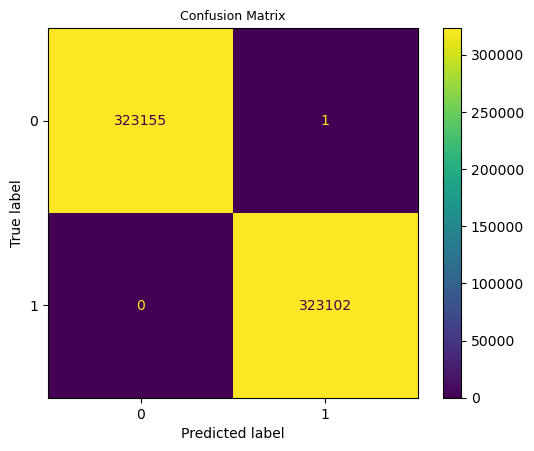

In [60]:
cm = ConfusionMatrixDisplay(cm)
cm.plot()
plt.title('Confusion Matrix',fontsize=9)
plt.show()

In [61]:
print(classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000    323156
           1    1.00000   1.00000   1.00000    323102

    accuracy                        1.00000    646258
   macro avg    1.00000   1.00000   1.00000    646258
weighted avg    1.00000   1.00000   1.00000    646258



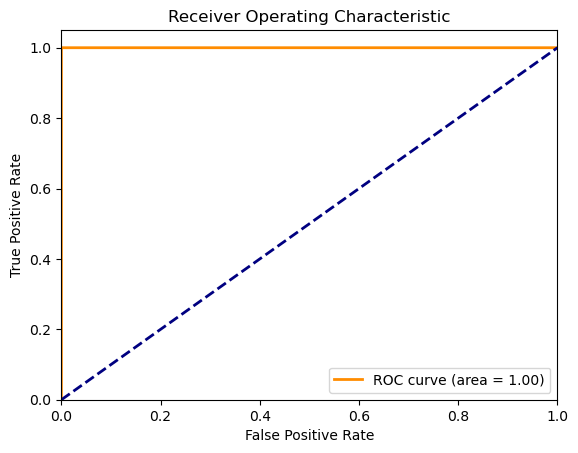

In [62]:
from sklearn.metrics import roc_curve, auc,matthews_corrcoef
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [63]:
mcc = matthews_corrcoef(y_test, y_pred)


In [64]:

print("Matthews Correlation Coefficient:", mcc)


Matthews Correlation Coefficient: 0.9999969052655151


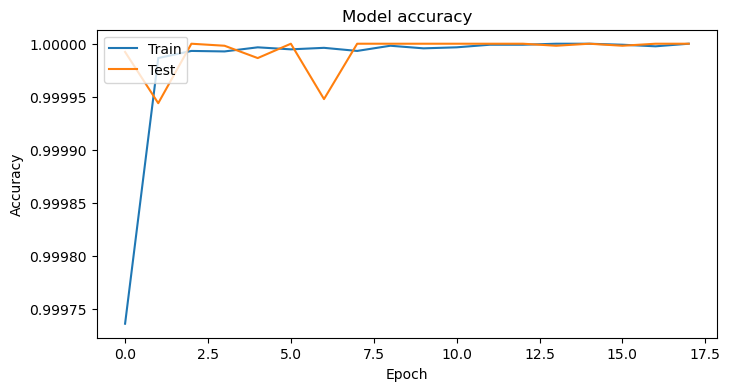

In [65]:
# Plot training & validation accuracy values
plt.figure(figsize= (8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

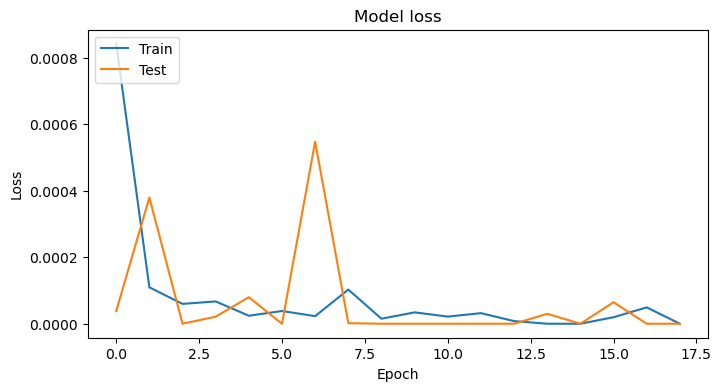

In [66]:
# Plot training & validation loss values
plt.figure(figsize= (8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

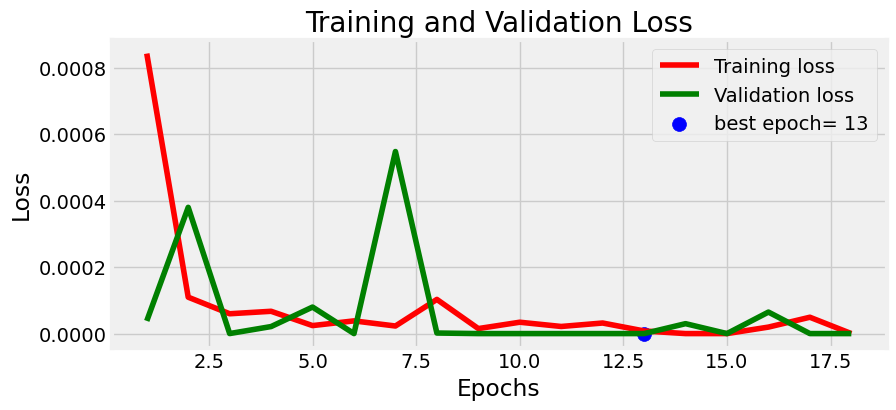

In [67]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (10, 4))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 100, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()